In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime, date
from glob import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# name of file w/ topic counts 
# swap this one out w/ aby new feature list
count_file = "20190204-newspaper-topics-all-as-chunked.csv"

In [5]:
# load csv into pandas dataframe

df = pd.read_csv(count_file)
    
# csv has header row in format "feature" then each topic number 0-99
# then rows in format feature, t00-proportion, t02-proportion etc.
# each row totals the number of articles in that slice
# each column totals the proportion of that topic in corpus   

In [6]:
# assign 
df_by_feature = df.set_index('Feature') # need to change this if col not labeled "Feature"

In [7]:
# look at topics that have high PMI with Child as feature. This is defined as:

# PMI(topic, child-slice) = log P (topic, child-slice) - log P (topic) - log P (child-slice)
# variant of : https://github.com/jacobeisenstein/gt-css-class/blob/master/labs/lab6/Lab%206%20-%20Text%20over%20time.ipynb

# PMI functions 

# this computues $p(i)$ where $i$ is a topic
def get_p_topic(df_by_feature): 
    df_tot = np.array(df_by_feature.sum(axis=0))
    return df_tot / df_by_feature.values.sum()

print(df_by_feature.values.sum())

187146.000000912


In [8]:
P_base = get_p_topic(df_by_feature)

Text(0,0.5,'proportion')

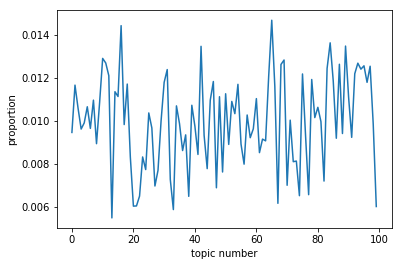

In [9]:
plt.plot(P_base)
plt.xlabel('topic number')
plt.ylabel('proportion')

In [10]:
P_base

array([0.0094672 , 0.0116669 , 0.01059192, 0.0096253 , 0.00990939,
       0.0106613 , 0.00965507, 0.01096788, 0.00894538, 0.01084564,
       0.01290889, 0.01269613, 0.01210593, 0.00549467, 0.01136007,
       0.01113825, 0.01443113, 0.0098333 , 0.01171638, 0.00832552,
       0.00604227, 0.00605185, 0.00650877, 0.0083284 , 0.0077416 ,
       0.01037403, 0.00967436, 0.00697822, 0.00770481, 0.01000184,
       0.01179593, 0.01238994, 0.0072775 , 0.00588213, 0.01070227,
       0.00987281, 0.00862596, 0.00935492, 0.00649741, 0.01073114,
       0.00975905, 0.00844457, 0.01347027, 0.00932836, 0.00778555,
       0.01096815, 0.01183432, 0.00689522, 0.01112775, 0.00762897,
       0.01126581, 0.00891165, 0.0109083 , 0.0103401 , 0.01170398,
       0.00892889, 0.0079934 , 0.01027796, 0.00922286, 0.00963514,
       0.0110402 , 0.00852906, 0.00915724, 0.00907634, 0.01207323,
       0.01468248, 0.01160145, 0.00617263, 0.01262794, 0.0128343 ,
       0.00701152, 0.01003868, 0.00810832, 0.0081371 , 0.00652

In [11]:
print(P_base.argsort()[::-1]) # topics ranked highest to lowest
print(sorted(P_base)[::-1]) # their scores

[65 16 84 89 42 10 69 11 93 87 68 95 97 83 94 31 92 75 12 64 78 85 46 96
 30 18 54  1 66 14 50 15 48 90 60 45  7 52  9 39 34  5 80  2 25 53 57 79
 71 29 81  4 35 98 17 40 26  6 59  3  0 88 37 43 76 91 58 86 62 63  8 55
 51 36 61 41 23 19 73 72 56 44 24 28 49 32 82 70 27 47 77 74 22 38 67 21
 20 99 33 13]
[0.014682482161395966, 0.014431132146809652, 0.013632347728070957, 0.013482033064333218, 0.013470273326802151, 0.012908889813184504, 0.01283430289511021, 0.012696133758126922, 0.012686712518025655, 0.012636696744512173, 0.012627944739606956, 0.012564208066955965, 0.012544595119791816, 0.012443602434616029, 0.012408885023931492, 0.01238994191235025, 0.012197356396176653, 0.012185584295677634, 0.012105925426666664, 0.01207323221366735, 0.011928550470643888, 0.011860367713278313, 0.011834318130813416, 0.0117961636284999, 0.01179593028228892, 0.011716379304175963, 0.011703979847938644, 0.01166689803538072, 0.011601450293137012, 0.011360074532181502, 0.011265810823580124, 0.0111382473237998

In [12]:
# now compute p(paper) and p(topic,paper)

# first, get sum of all topics for each feature -- essentially, sum of each row 
all_features = list(df_by_feature.index)
print(all_features)

['NationalAntiSlaveryStandard', 'TheLiberator', 'WeeklyAdvocateAndColoredAmerican', 'ProvincialFreeman', 'AllDouglass', 'FreedomsJournal', 'TheChristianRecorder', 'TheNationalEra']


In [13]:
def get_p_feature(df_by_feature):
    df_tot = np.array(df_by_feature.sum(axis=1))
    return df_tot / df_by_feature.values.sum()

P_feature = get_p_feature(df_by_feature)

In [14]:
P_feature

array([0.04758317, 0.51811954, 0.03457728, 0.02679192, 0.10026931,
       0.01093798, 0.08505659, 0.17666421])

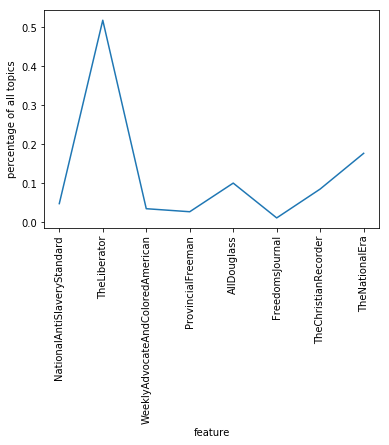

In [15]:
plt.plot(all_features,P_feature)
plt.xlabel('feature')
plt.ylabel('percentage of all topics')
plt.xticks(rotation=90);

In [16]:
# now compute PMI

all_features.index('ProvincialFreeman')

3

In [17]:
df_by_feature.values

array([[  76.99450253,   79.25853042,  140.8268316 ,   76.4000915 ,
          76.69095904,   81.89708131,   80.339464  ,  151.2392926 ,
          89.52779825,   92.34719415,  110.2409837 ,  122.3048994 ,
         105.7928975 ,   36.07435759,  105.5134061 ,  102.2592917 ,
         266.9907957 ,   53.94697298,  106.8241223 ,   64.54474512,
          39.92632031,   42.74586756,   45.30401774,   83.97337825,
          49.2986292 ,   74.37582819,   89.64440912,   74.07805858,
          54.77230495,   82.33108018,  100.2563177 ,   82.42480918,
         280.0830654 ,   50.11728075,   20.60308447,   63.45588134,
          68.0536454 ,   32.09392154,   41.71767748,   85.57542166,
         109.9170956 ,   73.62401408,  153.3540745 ,   74.91872755,
          66.87707477,   84.0337291 ,  227.448906  ,   50.06987501,
          91.05911376,  293.5689744 ,   91.34999976,   78.70987266,
          54.3299679 ,   75.40709065,   91.68349277,   89.87835291,
          79.40116367,   98.89674197,   75.03122

In [18]:
idx_Test = all_features.index('ProvincialFreeman')

df_by_feature.values[idx_Test,:]

array([ 76.60722801,  49.95122684,  67.71457747,  51.93983261,
        49.52573601,  49.80767048,  44.45971801,  49.61582251,
       104.6661479 ,  71.20053451,  53.9942192 ,  66.53283642,
        67.0360193 ,  37.54540896,  32.16206368,  71.22314736,
        40.11320471,  61.39542251,  61.64857341,  54.69617989,
        40.36660526,  34.15190462,  39.91550249,  47.78122549,
        46.52528635,  89.37813833,  64.91524211,  31.5808782 ,
        45.80944015,  66.91017817,  59.09447491,  46.70091098,
        30.50383109,  32.51989763,  21.05715717,  33.42933911,
        43.81321367,  30.73077759,  36.528272  ,  46.75382588,
        47.64166182,  58.21379799,  41.31379447,  79.90079007,
        45.47404858,  47.17625569,  71.47630859,  37.32738563,
        41.95276799,  30.1483408 ,  47.94697321,  33.18978485,
        60.08096557,  39.77556259,  25.96044018,  40.07824684,
        62.71391704, 133.1542571 ,  68.10708045,  21.51598504,
        53.24648747,  63.30264471,  36.6249551 ,  48.26

In [19]:
df_by_feature.values.sum()

187146.000000912

In [20]:
idx_Test = all_features.index('ProvincialFreeman')
pmi_Test = np.log(df_by_feature.values[idx_Test,:]/df_by_feature.values.sum()) - np.log(P_base) - np.log(P_feature[idx_Test])



In [21]:
pmi_Test

array([ 4.78623751e-01, -1.57942538e-01,  2.42976348e-01,  7.34565224e-02,
       -3.22419598e-03, -7.06851644e-02, -8.51337993e-02, -1.02895587e-01,
        8.47404169e-01,  2.69503067e-01, -1.81273218e-01,  4.41640882e-02,
        9.93010393e-02,  3.09538481e-01, -5.71551363e-01,  2.43198979e-01,
       -5.89916253e-01,  2.19326564e-01,  4.82282861e-02,  2.70234260e-01,
        2.86989659e-01,  1.18219691e-01,  2.01380814e-01,  1.34727807e-01,
        1.81152940e-01,  5.41336742e-01,  2.91369031e-01, -1.02475881e-01,
        1.70410836e-01,  2.88347628e-01, -8.51147480e-04, -2.85355336e-01,
       -1.79169463e-01,  9.76992039e-02, -9.35449818e-01, -3.92584474e-01,
        1.29255781e-02, -4.22872021e-01,  1.14448561e-01, -1.40487294e-01,
       -2.67213809e-02,  3.18365102e-01, -4.91522831e-01,  5.35492967e-01,
        1.52638820e-01, -1.53338658e-01,  1.86128420e-01,  7.66654286e-02,
       -2.85131488e-01, -2.38056647e-01, -1.63910873e-01, -2.97351691e-01,
        9.39347948e-02, -

In [22]:
print(pmi_Test.argsort()[::-1]) # topics ranked highest pmi to lowest
print(sorted(pmi_Test)[::-1]) # their scores

[70 57  8 25 43 72  0 56 61 58 41 76 13 74 26 29 20 19  9 15  2 17 22 46
 92 24 28 44 99 23 21 38 12 33 52 67 47  3 63 18 11 80 98 83 36 91 30  4
 71 40 60 88 79  5  6 27  7 86 81 55 73 82 69 77 85 39 78 97 45  1 50 94
 32 10 64 62 49 84 75 53 48 31 66 51 89 96 35 68 37 87 93 95 42 14 16 65
 59 54 34 90]
[1.0126320753374443, 0.9492720402079065, 0.8474041685727216, 0.541336741664797, 0.5354929665141186, 0.5175866341701822, 0.47862375100845744, 0.44773260314130736, 0.39221447801504405, 0.3871623292279538, 0.3183651022969882, 0.313954774082728, 0.3095384805772299, 0.30689456158528605, 0.2913690312908792, 0.28834762797136415, 0.28698965889142203, 0.2702342602890977, 0.2695030671417826, 0.24319897889810305, 0.24297634807665647, 0.21932656358919678, 0.2013808142415896, 0.18612841999749152, 0.18600763235968953, 0.1811529401115055, 0.1704108357310843, 0.1526388200450559, 0.14829814599460311, 0.13472780670775597, 0.11821969105230012, 0.11444856059999031, 0.09930103927779, 0.09769920392985165, 0

In [23]:
def get_pmi_by_feature(df_by_feature,P_base,P_feature,feature):
    idx = list(df_by_feature.index).index(feature)
    
    pmi = np.log(df_by_feature.values[idx,:]/df_by_feature.values.sum()) - np.log(P_base) - np.log(P_feature[idx])
    return pmi

get_pmi_by_feature(df_by_feature,P_base,P_feature,'ProvincialFreeman')
    

array([ 4.78623751e-01, -1.57942538e-01,  2.42976348e-01,  7.34565224e-02,
       -3.22419598e-03, -7.06851644e-02, -8.51337993e-02, -1.02895587e-01,
        8.47404169e-01,  2.69503067e-01, -1.81273218e-01,  4.41640882e-02,
        9.93010393e-02,  3.09538481e-01, -5.71551363e-01,  2.43198979e-01,
       -5.89916253e-01,  2.19326564e-01,  4.82282861e-02,  2.70234260e-01,
        2.86989659e-01,  1.18219691e-01,  2.01380814e-01,  1.34727807e-01,
        1.81152940e-01,  5.41336742e-01,  2.91369031e-01, -1.02475881e-01,
        1.70410836e-01,  2.88347628e-01, -8.51147480e-04, -2.85355336e-01,
       -1.79169463e-01,  9.76992039e-02, -9.35449818e-01, -3.92584474e-01,
        1.29255781e-02, -4.22872021e-01,  1.14448561e-01, -1.40487294e-01,
       -2.67213809e-02,  3.18365102e-01, -4.91522831e-01,  5.35492967e-01,
        1.52638820e-01, -1.53338658e-01,  1.86128420e-01,  7.66654286e-02,
       -2.85131488e-01, -2.38056647e-01, -1.63910873e-01, -2.97351691e-01,
        9.39347948e-02, -

In [24]:
for feature in list(df_by_feature.index):
    pmi = get_pmi_by_feature(df_by_feature,P_base,P_feature,feature)
    
    print("===", feature, "===")
    print(pmi.argsort()[::-1][:10]) # topics ranked highest pmi to lowest
    print(sorted(pmi)[::-1][:10]) # their scores
 

=== NationalAntiSlaveryStandard ===
[32 49 91 46 16  7  2 62 74 42]
[1.4636855560971793, 1.4635471640203561, 1.0422900681841072, 0.7693090807732097, 0.7312134405016608, 0.4372790122639789, 0.40082694074700287, 0.2947124876503602, 0.2759242413970857, 0.24565126169669105]
=== TheLiberator ===
[90 34 59 54 14 42 82 37 77 16]
[0.44997915353110285, 0.44328924868513253, 0.41335764267287667, 0.4045162090265788, 0.2459241310954563, 0.23308635367667607, 0.20721739637468373, 0.20071688193751358, 0.19738382324539439, 0.1936370903994713]
=== WeeklyAdvocateAndColoredAmerican ===
[92 30  6 79 93 12 31 29 75 39]
[0.8264764048018636, 0.559160370026194, 0.5103045300589972, 0.46482856559046226, 0.4553699574120138, 0.4537903114690174, 0.39089459241640334, 0.37599009312150766, 0.32936181814022447, 0.31960285303077995]
=== ProvincialFreeman ===
[70 57  8 25 43 72  0 56 61 58]
[1.0126320753374443, 0.9492720402079065, 0.8474041685727216, 0.541336741664797, 0.5354929665141186, 0.5175866341701822, 0.4786237510

In [25]:
# print same thing to file
fout = open("20190204-pmi-antislavery-only.txt","w")

for feature in list(df_by_feature.index):
    pmi = get_pmi_by_feature(df_by_feature,P_base,P_feature,feature)
    
    print("===", feature, "===", file=fout)
    print(pmi.argsort()[::-1][:10], file=fout) # topics ranked highest pmi to lowest
    print(sorted(pmi)[::-1][:10], file=fout) # their scores
    
fout.close()
    

In [ ]:
# now do cosine similarity on all combos of papers -- to here

np.zeros(X_all_years.shape[0]-1)

for i,X_year in enumerate(X_all_years[:-1,]):
    corr[i] = X_year.dot(X_all_years[i+1,]) / ((np.linalg.norm(X_year)) * (np.linalg.norm(X_all_years[i+1,])))

